### Modelling
We'll follow below steps:
1. Split data
2. Apply ML models<br>
   i.    linear regression<br>
   ii.   linear lasso regression<br>
   iii.  linear ridge regression<br>
   iv.   linaer elastic net regression<br>
   v.    decision tree regression<br>
   vi.   random forest regression<br>
3. Apply Deep Learning model
4. We'll perform CV on the best performing models
5. Save the model


In [74]:
# Imports 
from datetime import datetime
import pandas as pd
import numpy as np

# ML
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# DL
import tensorflow as tf 
from tensorflow import keras
from tensorflow.keras import layers

# Model evaluation
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Cross Validation
from sklearn.model_selection import GridSearchCV

# Plotting
import matplotlib.pyplot as plt 
import seaborn as sns

# To save model
import pickle 



In [6]:
# Import data
data = pd.read_csv('../data/processed/vectorized_data.csv', sep=",")

In [7]:
data.head()

,airline,ch_code,num_code,from,time_taken,stop,to,price,type,days_left,dep_time_phase,arr_time_phase
0,7,7,1053,1,60050,0,3,81585,0,49,3,4
1,7,7,1250,2,6650,0,4,6578,1,49,3,2
2,0,2,600,2,62850,0,3,3551,1,49,4,3
3,0,2,415,2,123400,0,3,3551,1,49,3,3
4,0,2,424,2,129250,0,3,3551,1,49,3,3


In [8]:
X = data.drop(['price'], axis=1)
X.head()

,airline,ch_code,num_code,from,time_taken,stop,to,type,days_left,dep_time_phase,arr_time_phase
0,7,7,1053,1,60050,0,3,0,49,3,4
1,7,7,1250,2,6650,0,4,1,49,3,2
2,0,2,600,2,62850,0,3,1,49,4,3
3,0,2,415,2,123400,0,3,1,49,3,3
4,0,2,424,2,129250,0,3,1,49,3,3


In [9]:
y = data['price']
y

0         81585
1          6578
2          3551
3          3551
4          3551
          ...  
300254     9831
300255     9840
300256     7425
300257     5955
300258     5953
Name: price, Length: 300259, dtype: int64

#### 1. Split data into train and test

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=15)
print('Shape of X_train: {0}'.format(X_train.shape))
print('Shape of X_test: {0}'.format(X_test.shape))
print('Shape of y_train: {0}'.format(y_train.shape))
print('Shape of y_test: {0}'.format(y_test.shape))

Shape of X_train: (201173, 11)
Shape of X_test: (99086, 11)
Shape of y_train: (201173,)
Shape of y_test: (99086,)


#### 2. Apply ML models

In [49]:
all_regressors = [LinearRegression(), Ridge(), Lasso(), ElasticNet(), DecisionTreeRegressor(), RandomForestRegressor()]

LinearRegression

Training complete! Time taken: 0:00:00.095529

Plots:


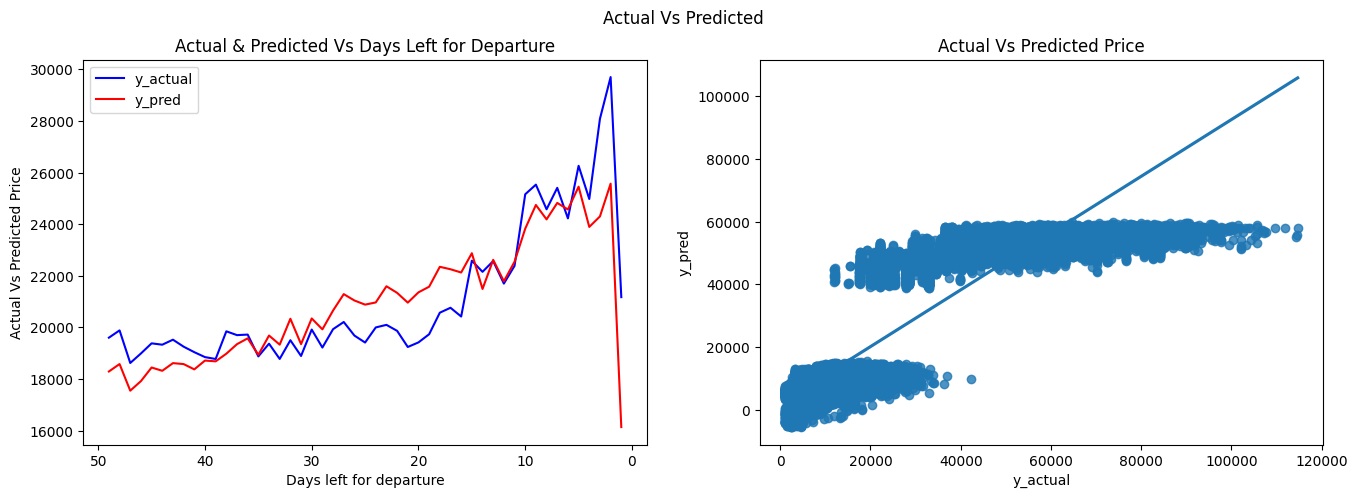

Model evaluation

Mean Absolute Error    : 4651.855299826539
Mean Squared Error     : 48806051.22510032
Root Mean Squared Error: 6986.132780380024
R2 Score               : 0.9047688693068968

**************************************************
Ridge

Training complete! Time taken: 0:00:00.051018

Plots:


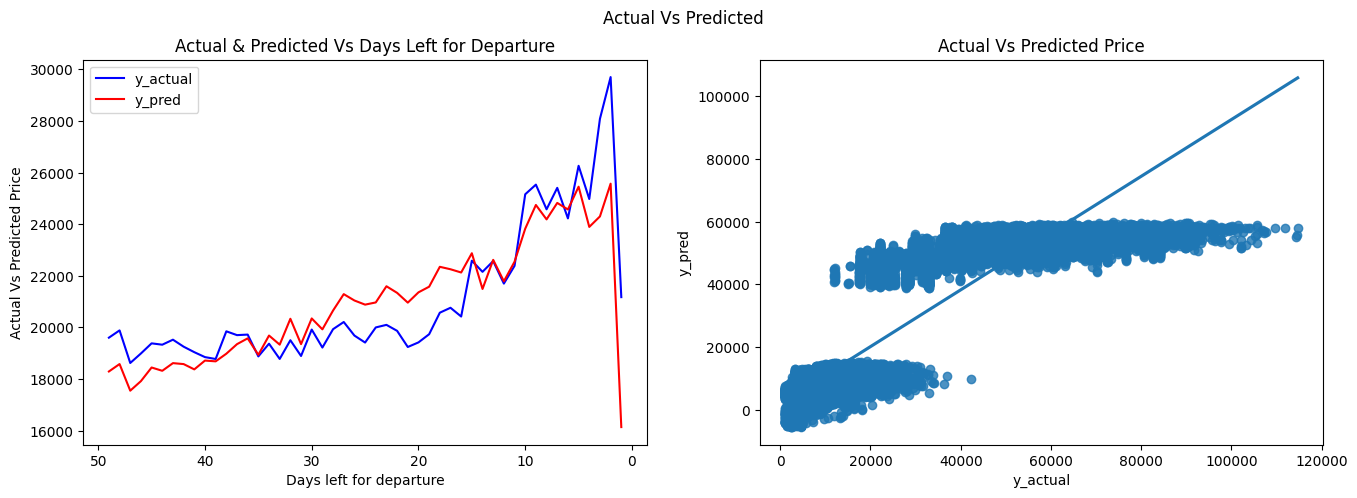

Model evaluation

Mean Absolute Error    : 4651.899838328724
Mean Squared Error     : 48806025.88305333
Root Mean Squared Error: 6986.1309666405
R2 Score               : 0.9047689187546953

**************************************************
Lasso

Training complete! Time taken: 0:00:00.211829

Plots:


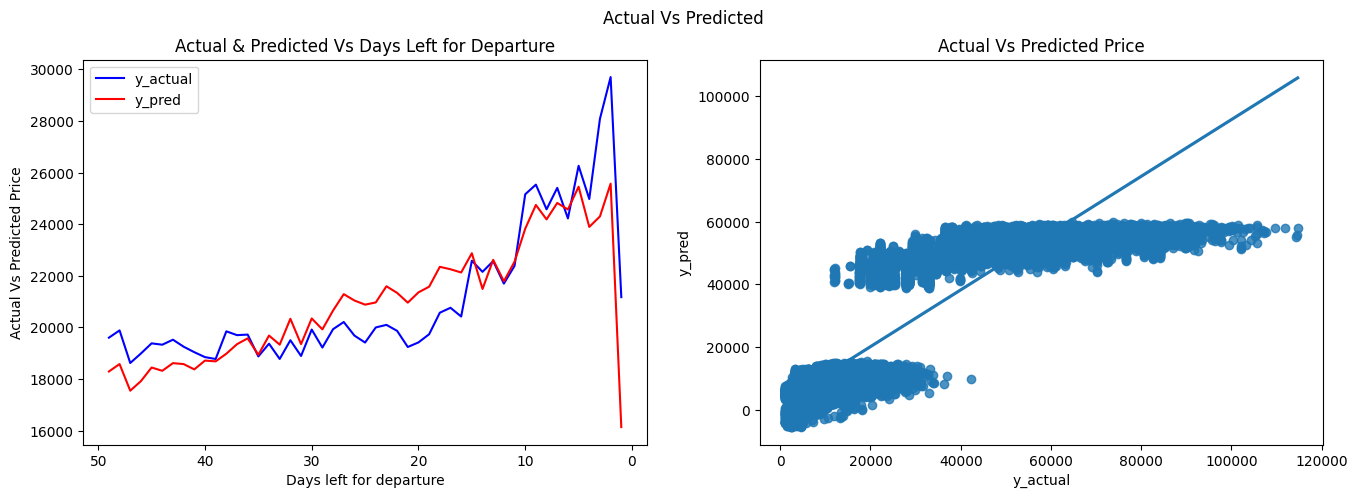

Model evaluation

Mean Absolute Error    : 4651.504467842695
Mean Squared Error     : 48805810.09820117
Root Mean Squared Error: 6986.1155228210455
R2 Score               : 0.9047693397974748

**************************************************
ElasticNet

Training complete! Time taken: 0:00:00.171138

Plots:


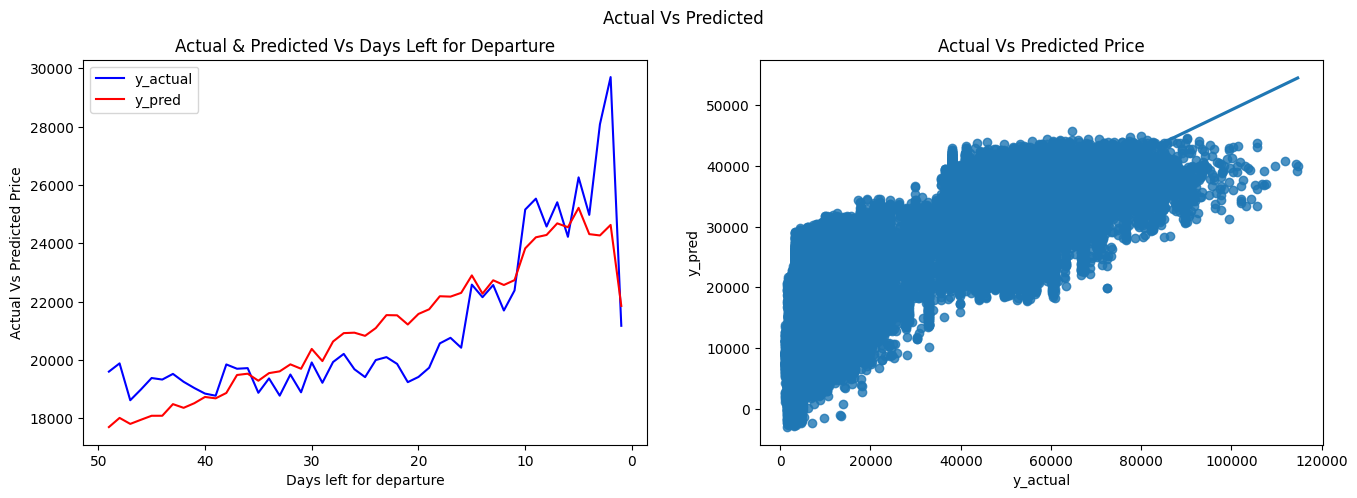

Model evaluation

Mean Absolute Error    : 12864.17495355029
Mean Squared Error     : 249489428.70817828
Root Mean Squared Error: 15795.23436699115
R2 Score               : 0.5131923235855405

**************************************************
DecisionTreeRegressor

Training complete! Time taken: 0:00:00.952073

Plots:


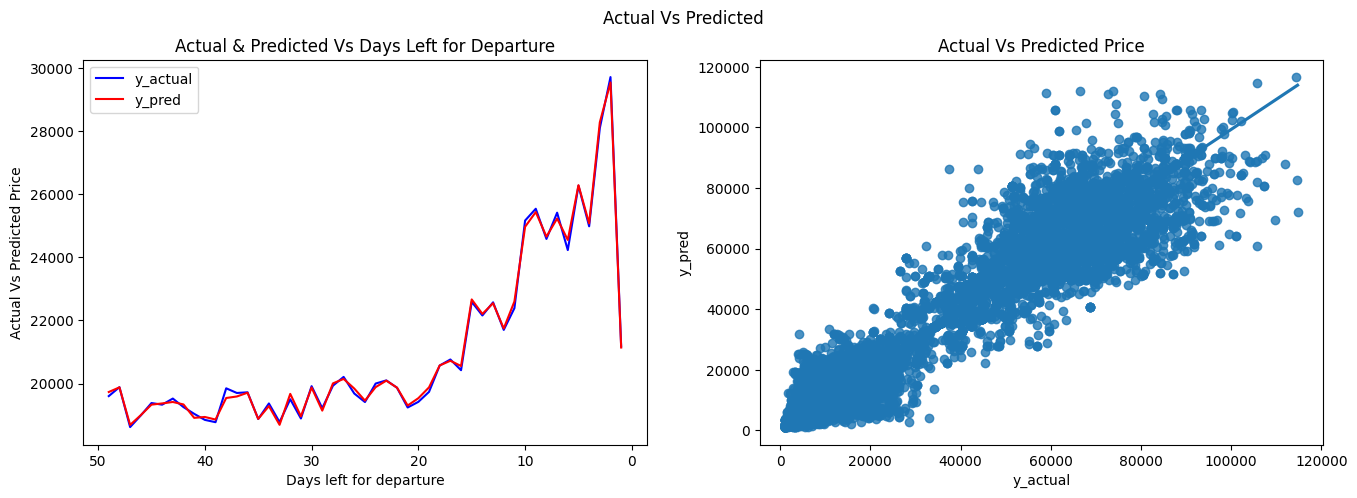

Model evaluation

Mean Absolute Error    : 947.9452882681039
Mean Squared Error     : 9315284.77488607
Root Mean Squared Error: 3052.0951451234396
R2 Score               : 0.9818238706149531

**************************************************
RandomForestRegressor

Training complete! Time taken: 0:01:01.880250

Plots:


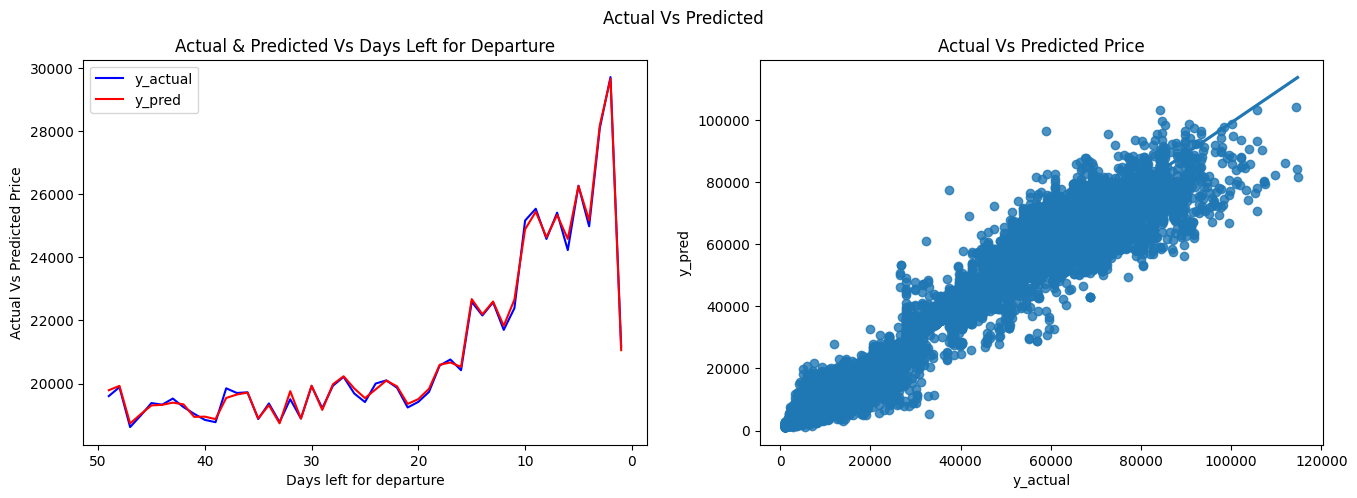

Model evaluation

Mean Absolute Error    : 912.7387023999755
Mean Squared Error     : 5786160.043114868
Root Mean Squared Error: 2405.443834953306
R2 Score               : 0.988709954002718

**************************************************
Summary


,Algorithm,Hyperparameters,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error,R2 Score,Training Time
0,LinearRegression,Default,4651.855300,4.880605e+07,6986.132780,0.904769,0 days 00:00:00.095529
1,Ridge,Default,4651.899838,4.880603e+07,6986.130967,0.904769,0 days 00:00:00.051018
2,Lasso,Default,4651.504468,4.880581e+07,6986.115523,0.904769,0 days 00:00:00.211829
3,ElasticNet,Default,12864.174954,2.494894e+08,15795.234367,0.513192,0 days 00:00:00.171138
4,DecisionTreeRegressor,Default,947.945288,9.315285e+06,3052.095145,0.981824,0 days 00:00:00.952073
5,RandomForestRegressor,Default,912.738702,5.786160e+06,2405.443835,0.988710,0 days 00:01:01.880250


In [50]:
summary = []
for regressor in all_regressors:
    start = datetime.now()
    regressor_str = str(regressor)[:-2]
    print(regressor_str) 
    
    # Training model
    regressor.fit(X_train, y_train)
    end = datetime.now() - start
    print('\nTraining complete! Time taken: {0}'.format(end))
    
    # Predicting
    y_pred = regressor.predict(X_test)
    
    # Plot the trend for y_pred & y_actual across 'days_left'
    print('\nPlots:')
    result =  pd.DataFrame({'days_left':X_test['days_left'],'y_actual':y_test, 'y_pred':y_pred})
    result.sort_values(by='days_left', ascending=False, inplace=True)
    fig = plt.figure(figsize=(16,5))
    fig.suptitle('Actual Vs Predicted')
    
    # Line plot
    ax = fig.add_subplot(1,2,1)    
    ax = sns.lineplot(data=result, x='days_left', y='y_actual', color='blue', errorbar=None)
    ax = sns.lineplot(data=result, x='days_left', y='y_pred', color='red', errorbar=None)
    ax.invert_xaxis()
    plt.title('Actual & Predicted Vs Days Left for Departure')
    plt.xlabel('Days left for departure')
    plt.ylabel('Actual Vs Predicted Price')   
    plt.legend(labels=['y_actual','y_pred'], fontsize=10)     
    
    # Scatter plot
    ax = fig.add_subplot(1,2,2)       
    ax = sns.regplot(data=result, x='y_actual', y='y_pred')
    plt.title('Actual Vs Predicted Price')
    plt.xlabel('y_actual')
    plt.ylabel('y_pred')
        
    plt.show()
        
    # Evaluation using metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2_scr = r2_score(y_test, y_pred)
    print('Model evaluation\n')
    print('Mean Absolute Error    : {0}'.format(mae))
    print('Mean Squared Error     : {0}'.format(mse))
    print('Root Mean Squared Error: {0}'.format(rmse))
    print('R2 Score               : {0}'.format(r2_scr))

    # Add everything to summary list
    temp = list()
    temp.append(regressor_str)
    temp.append('Default')
    temp.extend([mae, mse, rmse, r2_scr])
    temp.append(end)
    summary.append(temp)
    print('')
    print('*'*50)
    
print('Summary')
summary_result = pd.DataFrame(summary, columns=['Algorithm', 'Hyperparameters', 'Mean Absolute Error', 'Mean Squared Error', 'Root Mean Squared Error','R2 Score','Training Time'])
summary_result

#### 3. Apply Neural Network
We'll build Sequential model using Keras with 1 input layer, 1 dense layer and 1 output layer

In [42]:
def build_sequential_model(loss, optimizer):
    model = keras.Sequential()
    
    # Input layer
    model.add(layers.Dense(32, kernel_initializer= 'uniform', activation='relu', input_shape=[len(X_train.keys())]))
    
    # Dense layers
    model.add(layers.Dense(16, kernel_initializer= 'uniform', activation='relu'))
    model.add(layers.Dropout(0.25))
    model.add(layers.Dense(8, kernel_initializer= 'uniform', activation='relu'))
    model.add(layers.Dropout(0.125))
    model.add(layers.Dense(4, kernel_initializer= 'uniform', activation='relu'))
    
    # Output layer
    model.add(layers.Dense(1))
    
    # Compile model
    model.compile(loss=loss, optimizer=optimizer, metrics=['mae'])
    
    return model

In [43]:
start = datetime.now()
print('Sequential model started...')
model = build_sequential_model(loss='mse', optimizer='adam')
print('Sequential model initialized. Time taken: {0}'.format(datetime.now()-start))

Sequential model started...
Sequential model initialized. Time taken: 0:00:00.325088


In [44]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_25 (Dense)            (None, 32)                384       
                                                                 
 dense_26 (Dense)            (None, 16)                528       
                                                                 
 dropout_4 (Dropout)         (None, 16)                0         
                                                                 
 dense_27 (Dense)            (None, 8)                 136       
                                                                 
 dropout_5 (Dropout)         (None, 8)                 0         
                                                                 
 dense_28 (Dense)            (None, 4)                 36        
                                                                 
 dense_29 (Dense)            (None, 1)                

In [51]:
# Early stopping before the model overfits
early_stopping = keras.callbacks.EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=20, # how many epochs to wait before stopping
    restore_best_weights=True)

print('Sequential model training started...')
start = datetime.now()
history = model.fit(X_train, y_train, batch_size=300, epochs=150, callbacks=[early_stopping], validation_split=0.30)
end = datetime.now()-start
print('\nTraining completed. Time taken: {0}'.format(end))


Sequential model training started...
Epoch 1/150
470/470 [==============================] - 1s 2ms/step - loss: 779876672.0000 - mae: 16565.7402 - val_loss: 696450176.0000 - val_mae: 16198.1377
Epoch 2/150
470/470 [==============================] - 1s 2ms/step - loss: 669941312.0000 - mae: 16342.1953 - val_loss: 644418432.0000 - val_mae: 16398.4707
Epoch 3/150
470/470 [==============================] - 1s 2ms/step - loss: 619902912.0000 - mae: 16676.6641 - val_loss: 594082432.0000 - val_mae: 16910.5859
Epoch 4/150
470/470 [==============================] - 1s 2ms/step - loss: 577231616.0000 - mae: 17366.6172 - val_loss: 553510592.0000 - val_mae: 17736.6855
Epoch 5/150
470/470 [==============================] - 1s 2ms/step - loss: 547940160.0000 - mae: 18200.6309 - val_loss: 530175424.0000 - val_mae: 18591.7500
Epoch 6/150
470/470 [==============================] - 1s 2ms/step - loss: 535550208.0000 - mae: 18917.3125 - val_loss: 521748160.0000 - val_mae: 19175.0723
Epoch 7/150
470/470 [

In [48]:
loss, mae = model.evaluate(X_test, y_test)
print('Test loss: {0}'.format(loss))
print('Test Mean Absolute Error: {0}'.format(mae))

3097/3097 [==============================] - 3s 847us/step - loss: 155495808.0000 - mae: 8452.1484
Test loss: 155495808.0
Test Mean Absolute Error: 8452.1484375


In [61]:
# Add this result to our summary dataframe
summary_result.loc[len(summary_result_2)] = ['Sequential DL', 'Adam (default), 3 dense, 2 dropouts', mae, loss, np.sqrt(loss), '-', end]

summary_result

,Algorithm,Hyperparameters,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error,R2 Score,Training Time
0,LinearRegression,Default,4651.855300,4.880605e+07,6986.132780,0.904769,0 days 00:00:00.095529
1,Ridge,Default,4651.899838,4.880603e+07,6986.130967,0.904769,0 days 00:00:00.051018
2,Lasso,Default,4651.504468,4.880581e+07,6986.115523,0.904769,0 days 00:00:00.211829
3,ElasticNet,Default,12864.174954,2.494894e+08,15795.234367,0.513192,0 days 00:00:00.171138
4,DecisionTreeRegressor,Default,947.945288,9.315285e+06,3052.095145,0.981824,0 days 00:00:00.952073
5,RandomForestRegressor,Default,912.738702,5.786160e+06,2405.443835,0.98871,0 days 00:01:01.880250
8,Sequential DL,"Adam (default), 3 dense, 2 dropouts",912.738702,1.554958e+08,12469.795828,-,0 days 00:00:44.372767


#### 4. Cross Validation on the best model 
The DecisionTreeRegresson and RandomForestRegressor have given us very good results. But the RandomForestRegressor took almost twice the time for training as DecisionTree. We will choose DecisionTree to go ahead for cross validation

In [64]:
start = datetime.now()
parameters = {'max_depth': (1,3,10,30), 'min_samples_split': (5,10,100,500)}

print('GridSearchCV started.')
dt = DecisionTreeRegressor()
gscv = GridSearchCV(dt, param_grid=parameters, return_train_score=True, scoring='neg_mean_squared_error', cv=5)
gscv.fit(X_train, y_train)
print('GridSearchCV completed... Time taken: {0}'.format(datetime.now()-start))

GridSearchCV started.
GridSearchCV completed... Time taken: 0:00:22.147229


In [65]:
cv_result = pd.DataFrame.from_dict(gscv.cv_results_)

In [71]:
print('Best parameters: {}'.format(gscv.best_params_))

Best parameters: {'max_depth': 30, 'min_samples_split': 10}


Lets take best parameters and train the model

In [73]:
start = datetime.now()
print("Training DecisionTreeRegressor with parameters: 'max_depth': 30, 'min_samples_split': 10\n")
reg = DecisionTreeRegressor(max_depth=30, min_samples_split=10)
reg.fit(X_train, y_train)
print("Training completed... Time taken: {}".format(datetime.now()-start))
y_pred = reg.predict(X_test)
print('Model evaluation')
print('MAE     : {}'.format(mean_absolute_error(y_test, y_pred)))
print('MSE     : {}'.format(mean_squared_error(y_test, y_pred)))
print('R2 Score: {}'.format(r2_score(y_test, y_pred)))

Training DecisionTreeRegressor with parameters: 'max_depth': 30, 'min_samples_split': 10

Training completed... Time taken: 0:00:00.770640
Model evaluation
MAE     : 1003.2027361087187
MSE     : 7814058.528296639
R2 Score: 0.9847530867531222


##### 5. Save the model

In [75]:
with open('../models/decision_tree_regressor.pkl', 'wb') as file:
    pickle.dump(reg, file)
    print('Model saved!')

Model saved!
